In [123]:
#import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

# Data Cleaning

In [124]:
#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D208/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [125]:
#determine column names, non-null values, & data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [126]:
#There are no missing/null values. 

#determine if any rows are duplicated 
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
0


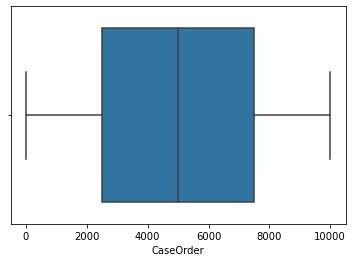

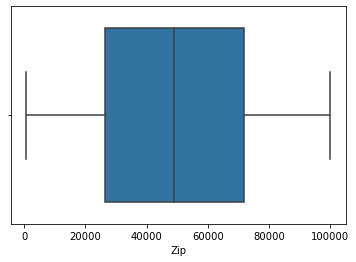

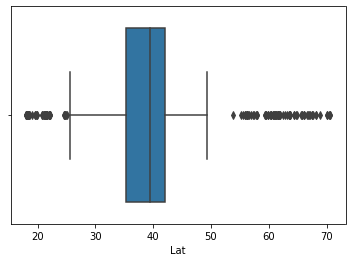

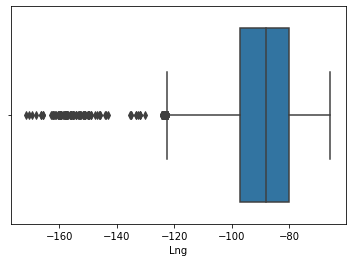

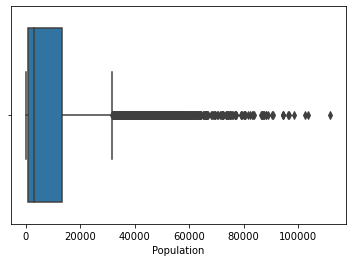

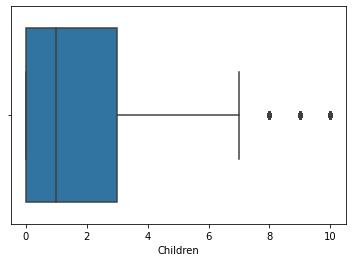

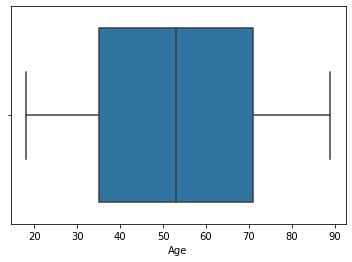

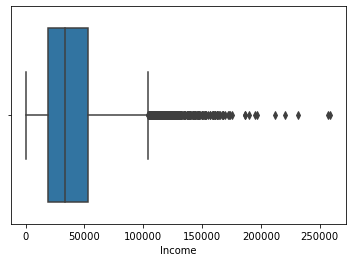

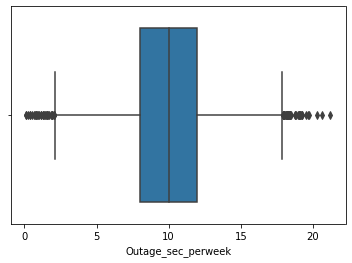

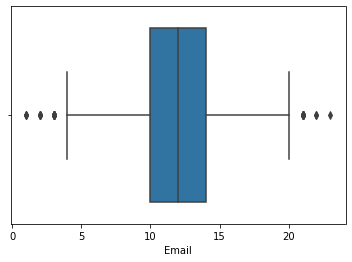

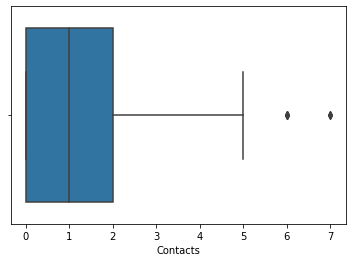

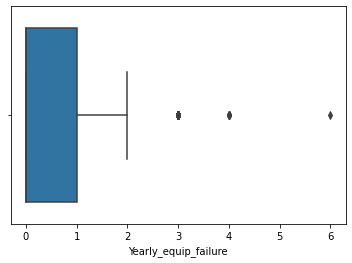

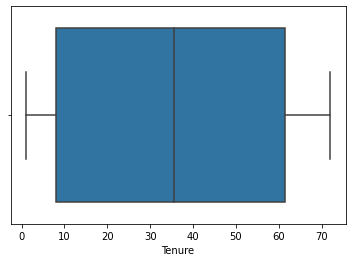

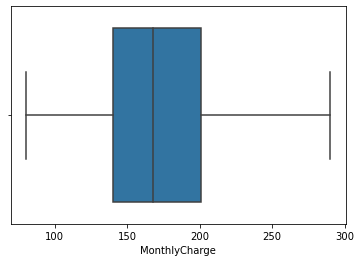

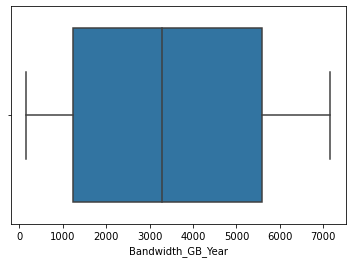

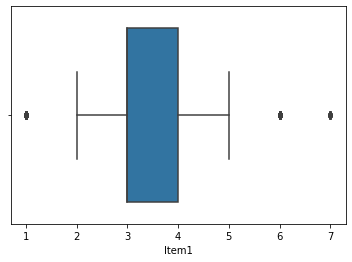

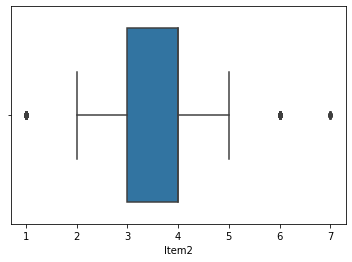

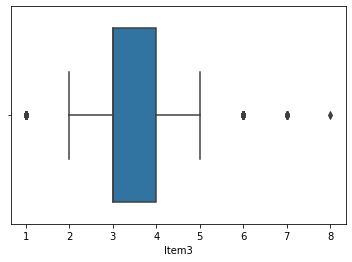

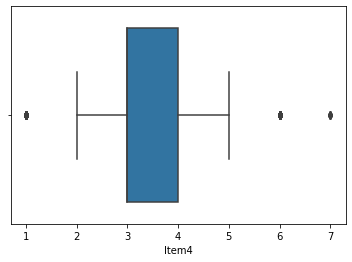

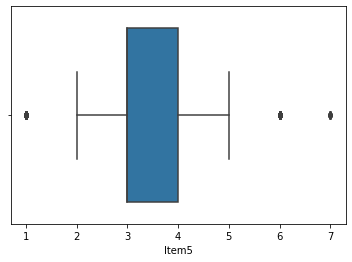

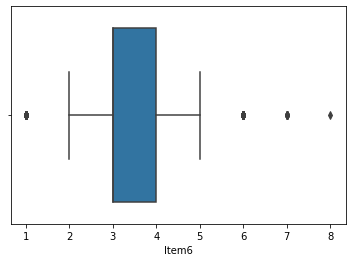

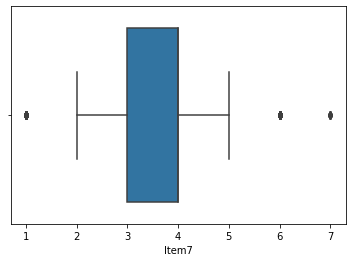

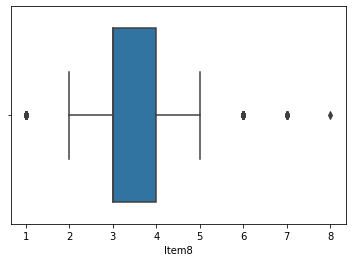

In [127]:
#There are no duplicated values

#Using Boxplots, check for outliers in each in each float or integer value column.
outliers = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

i=0 
while i < len(outliers):
    sns.boxplot(x = outliers[i], data = df)
    plt.show()
    i = i + 1
#(Python - Loop Lists, 2022)

In [128]:
#Outliers found in Lat, Lng, Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Item1, Item2, Item3, Item4, Item5, Item6, Item7, & Item8 columns. 

#Treating outliers: 
df['Lat'].describe()

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64

In [129]:
#Retain outliers in Lat (Incuding US territories, the min and max are within a valid range) (Bathman, 2018)
df['Lng'].describe()

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64

In [130]:
#Retain outliers in Lng (Incuding US territories, the min and max are within a valid range) (Bathman, 2018)
print(df['Population'].describe())

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


In [131]:
#Replace outlier population values > 27,000 
#New York City, NY, has the most density population in the US. In New York the max population density is a little over 27,000 per square mile. Therefore the right skewed outliers are likely entry errors. (Planning-Population-NYC Population Facts, n.d.)
df['Population'] = np.where(df['Population'] >= 27000, 2931, df['Population'])
print(df['Population'].describe())

count    10000.000000
mean      4949.264200
std       6338.293875
min          0.000000
25%        738.000000
50%       2910.500000
75%       5943.000000
max      26999.000000
Name: Population, dtype: float64


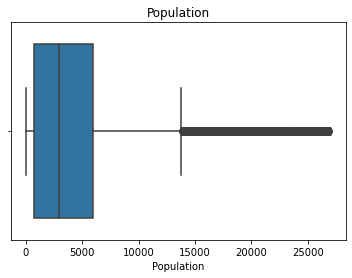

In [132]:
#Check distribution of population data. 
Population_boxplot = sns.boxplot(x = "Population", data = df).set_title("Population")
plt.show()

In [133]:
#Retain outliers in Children (All values are possible children values)
#Check that the max income is within a reasonable range
print(df['Income'].describe())

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


In [134]:
#Retain outliers in income (All values are possible income values)
#Check that the max and min outage_sec_perweek is within a reasonable range
print(df['Outage_sec_perweek'].describe())

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64


In [135]:
#Retain outliers in outage_sec_perweek (All values are possible outage values)
#Retain outliers in Email (All values are possible email values)
#Retain outliers in Contacts (All values are possible contact values)
#Retain outliers in Yearly_equip_failure (All values are possible equipment failure values)
#Check that the MonthlyCharge income is within a reasonable range
print(df['MonthlyCharge'].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


In [136]:
#Retain outliers in MonthlyCharge (All values are possible monthly charge values)
#Retain outliers in all item answers (All values are possible values for each item answer)

In [137]:
#Drop Columns not used as Target or Explanatory Variables 
df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Children', 'Age', 'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'InternetService', 'OnlineSecurity', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1, inplace = True)

# Data Exploration

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Outage_sec_perweek'}>],
       [<AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>]], dtype=object)

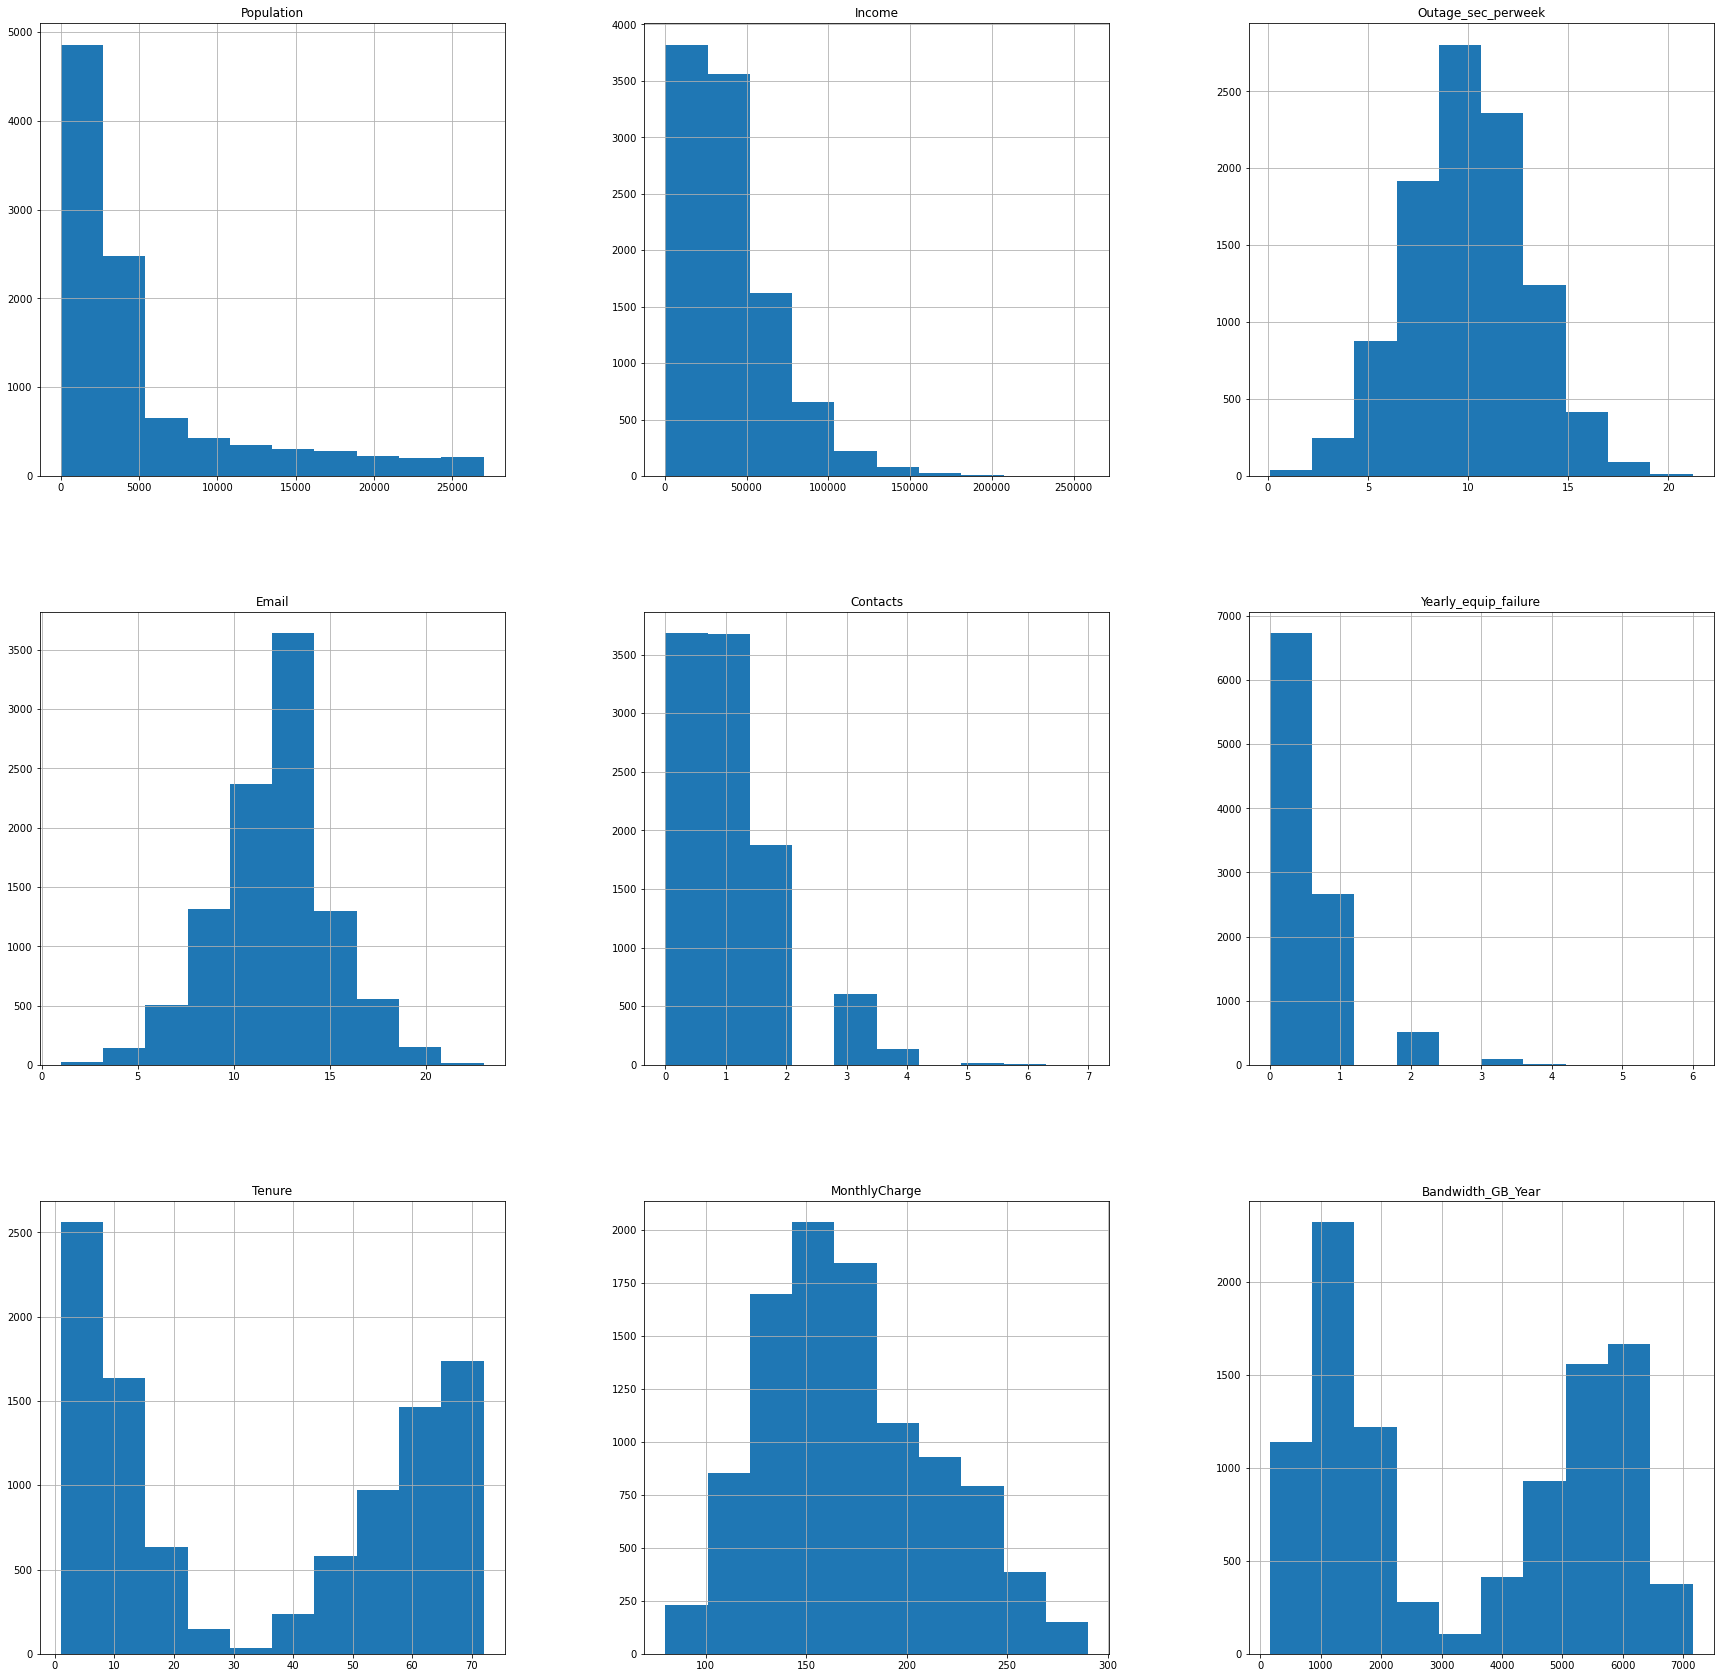

In [138]:
#Visually explore explanatory & target numeric variables with univariate analysis by creating histograms 
df.hist(column=["Population", "Income", "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"], figsize=(30,30))

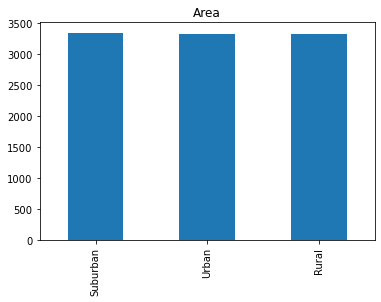

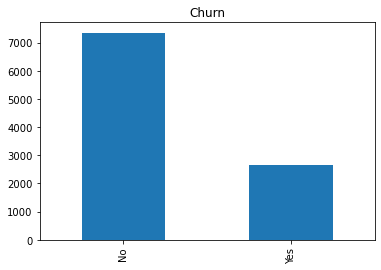

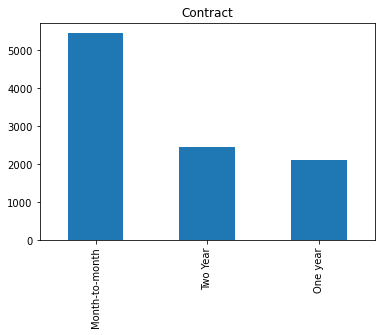

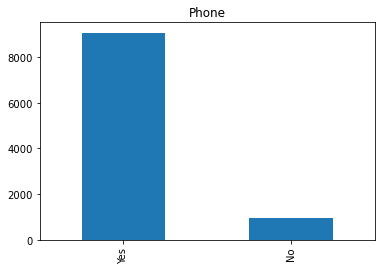

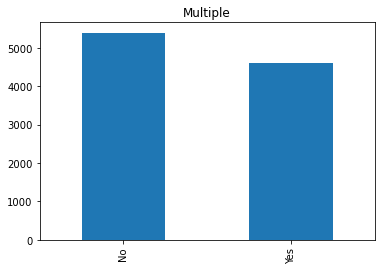

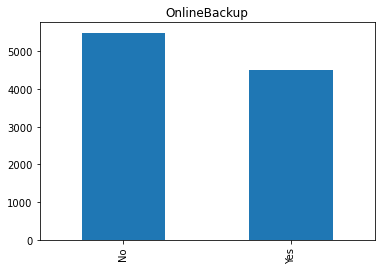

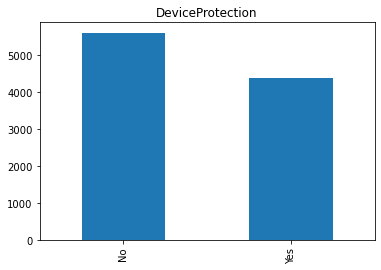

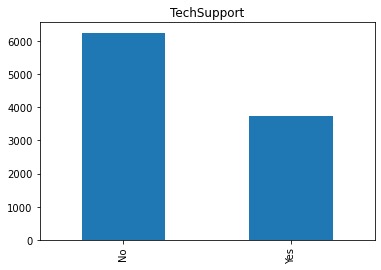

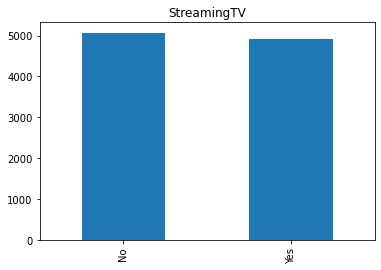

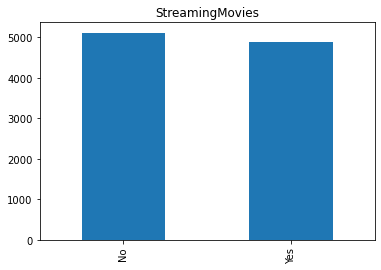

In [139]:
#Visually explore explanatory categorical variables with univariate analysis by creating bargraphs
categorical_variables = [df['Area'], df['Churn'], df['Contract'], df['Phone'], df['Multiple'], df['OnlineBackup'], df['DeviceProtection'], df['TechSupport'], df['StreamingTV'], df['StreamingMovies']]
cv = ['Area', 'Churn', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

i=0 
while i < len(categorical_variables):
    categorical_variables[i].value_counts().plot.bar()
    plt.title(cv[i])
    plt.show()
    i = i + 1
#(Python - Loop Lists, 2022)

In [140]:
#Descriptive Statistics for all relevant variables
relevant_variables = [df['Population'], df['Area'], df['Income'], df['Churn'], df['Outage_sec_perweek'], df['Email'], df['Contacts'], df['Yearly_equip_failure'], df['Contract'], df['Phone'], df['Multiple'], df['OnlineBackup'], df['DeviceProtection'], df['TechSupport'], df['StreamingTV'], df['StreamingMovies'], df['Tenure'], df['MonthlyCharge'], df['Bandwidth_GB_Year']]
rv = ['Population', 'Area', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(relevant_variables):
    print(' ')
    print(str(rv[i]) + ' Descriptive Statistics')
    print(relevant_variables[i]. describe())
    i = i + 1
    #(Python - Loop Lists, 2022)

 
Population Descriptive Statistics
count    10000.000000
mean      4949.264200
std       6338.293875
min          0.000000
25%        738.000000
50%       2910.500000
75%       5943.000000
max      26999.000000
Name: Population, dtype: float64
 
Area Descriptive Statistics
count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object
 
Income Descriptive Statistics
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64
 
Churn Descriptive Statistics
count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
 
Outage_sec_perweek Descriptive Statistics
count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: flo

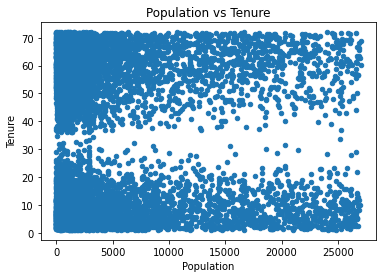

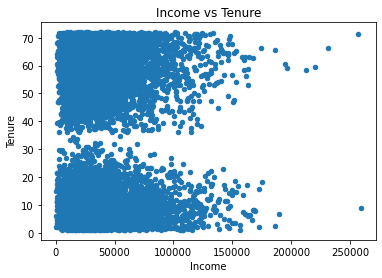

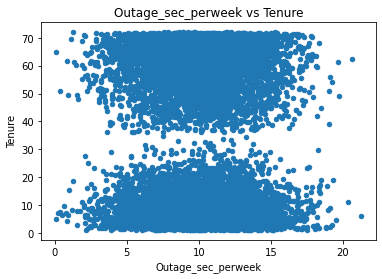

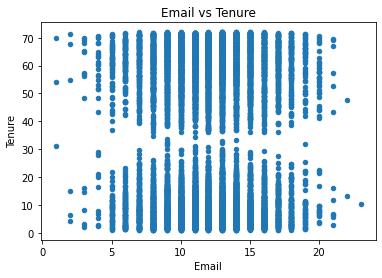

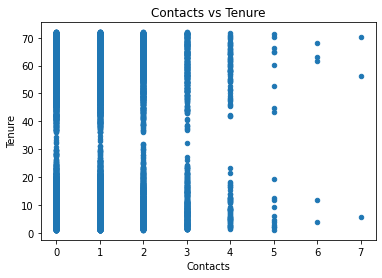

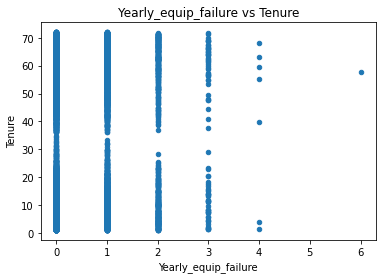

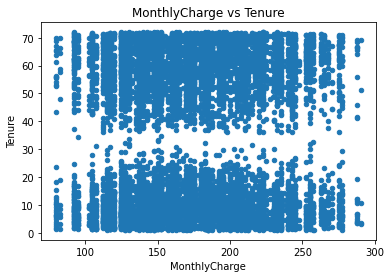

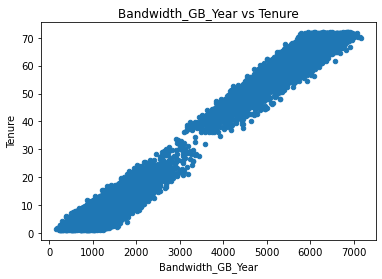

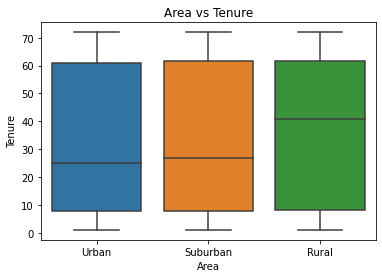

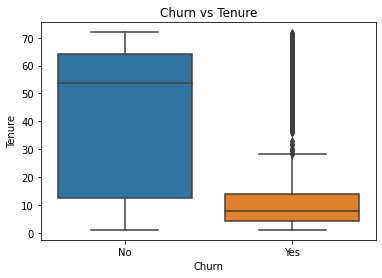

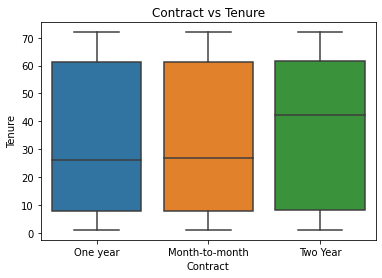

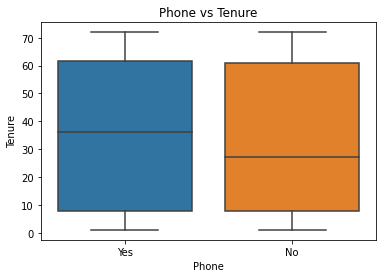

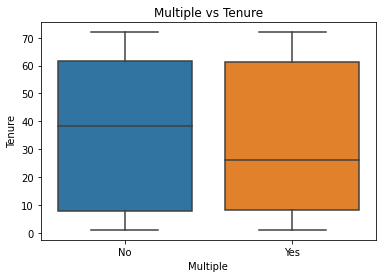

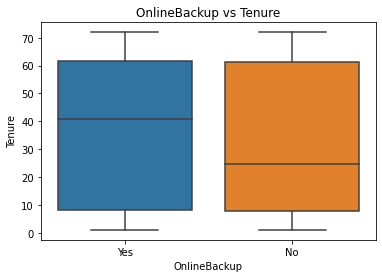

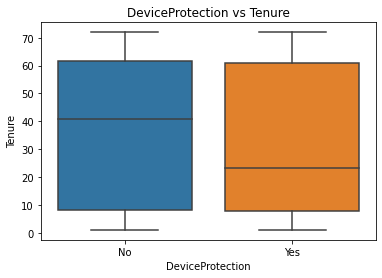

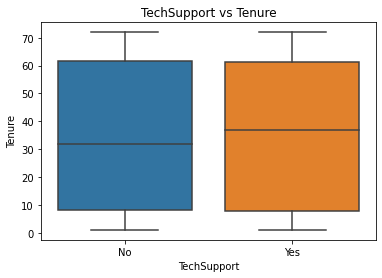

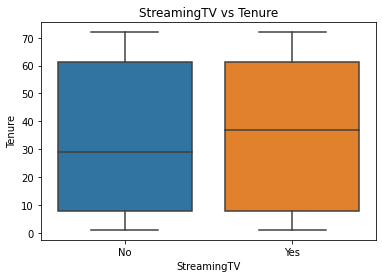

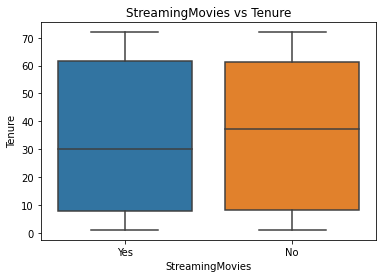

In [141]:
#Visually explore relationship between numeric target and numeric explanatory variables with bivariate analysis 
nv = ['Population', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(nv):
    df.plot.scatter(x = nv[i], y = 'Tenure')
    plt.title(str(nv[i]) + ' vs Tenure')
    plt.show()
    i = i + 1
#(Python - Loop Lists, 2022)
    
#Visually explore relationship between numeric target and categorical explanatory variables with bivariate analysis    
cv = ['Area', 'Churn', 'Contract', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

i=0 
while i < len(cv):
    sns.boxplot(data = df, x = cv[i], y = 'Tenure')
    plt.title(str(cv[i]) + ' vs Tenure')
    plt.show()
    i = i + 1
#(Python - Loop Lists, 2022)

# Data Wrangling

In [142]:
#Re-expressing Categorical Variables
#label encoding yes/no dichotomous binary columns. Yes = 1, No = 0
labelencoder = LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])
df['Phone'] = labelencoder.fit_transform(df['Phone'])
df['Multiple'] = labelencoder.fit_transform(df['Multiple'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
#(Great Learning Team, 2022)

In [143]:
#Ordinal Encoding
df['Contract_numeric'] = df['Contract'] 
dict_edu = {'Contract_numeric': {'Month-to-month': 0, 'One year': 1, 'Two Year': 2}}
df.replace(dict_edu, inplace = True)
#(Middleton, 2022)

In [144]:
#One-Hot Encoding 
dummy_area = pd.get_dummies(df['Area'], prefix='Area', drop_first=True)

df = pd.merge(
    left=df,
    right=dummy_area,
    left_index=True,
    right_index=True,
)
#(Pandas Get Dummies (One-Hot Encoding) Explained, 2021)

In [145]:
df.to_csv('/Users/Amanda.Hartzler/Desktop/D208_PA.csv')

# Multiple Linear Regession

In [146]:
#Create original multiple linear regression model with all explanatory variable included.
original_regression = ols('Tenure ~ Population + Area_Suburban + Area_Urban + Income + Churn + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + MonthlyCharge + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
original_regression.summary() #(GeeksforGeeks, 2022)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.140e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:59:49   Log-Likelihood:                -23970.
No. Observations:               10000   AIC:                         4.798e+04
Df Residuals:                    9980   BIC:                         4.813e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.5783      0.248    -18.479      0.000      -5.064      -4.093
Population             3.64e-06    4.2e-06      0.866      0.387    -4.6e-06    1.19e-05
Area_Suburban           -0.0259      0.065     -0.397      0.691      -0.154       0.102
Area_Urban               0.0196      0.065      0.301      0.764      -0.108       0.148
Income               -1.281e-06   9.44e-07     -1.356      0.175   -3.13e-06     5.7e-07
Churn                   -1.6484      0.081    -20.374      0.000      -1.807      -1.490
Outage_sec_perweek       0.0056      0.009      0.622      0.534      -0.012       0.023
Email                    0.0022      0.009      0.251      0.802      -0.015       0.019
Contacts                 0.0045      0.027      0.166      0.868      -0.048       0.057
Yearly_equip_failure    -0.0018      0.042     -0.042      0.966      -0.084       0.080
Contract_numeric        -0.2721      0.034     -8.113      0.000      -0.338      -0.206
Phone                    0.0346      0.092      0.378      0.706      -0.145       0.214
Multiple                -1.6588      0.077    -21.426      0.000      -1.811      -1.507
OnlineBackup            -1.6802      0.066    -25.527      0.000      -1.809      -1.551
DeviceProtection        -1.3132      0.058    -22.720      0.000      -1.427      -1.200
TechSupport             -0.4571      0.059     -7.797      0.000      -0.572      -0.342
StreamingTV             -3.6149      0.090    -40.132      0.000      -3.791      -3.438
StreamingMovies         -3.6330      0.105    -34.667      0.000      -3.838      -3.428
MonthlyCharge            0.0293      0.002     17.438      0.000       0.026       0.033
Bandwidth_GB_Year        0.0119   1.44e-05    825.802      0.000       0.012       0.012
==============================================================================
Omnibus:                      655.082   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.019
Skew:                          -0.361   Prob(JB):                     3.06e-88
Kurtosis:                       2.332   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
#Calculate residual Error of orignial model
np.sqrt(original_regression.scale)

2.662075883527437

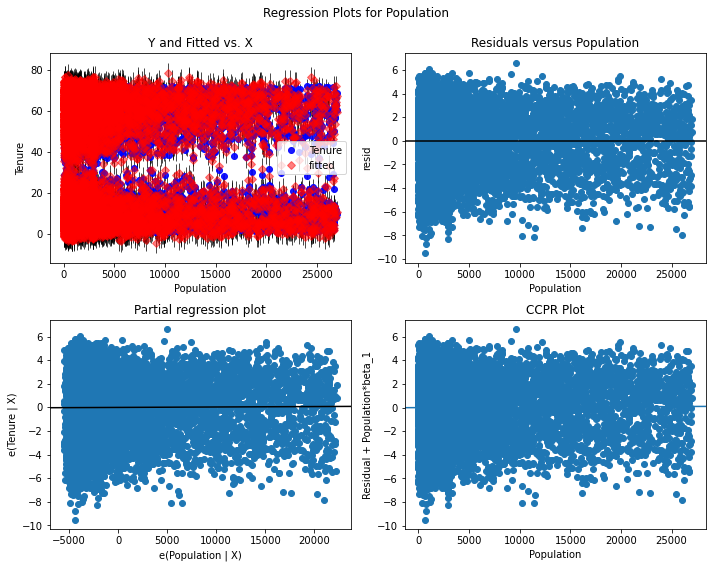

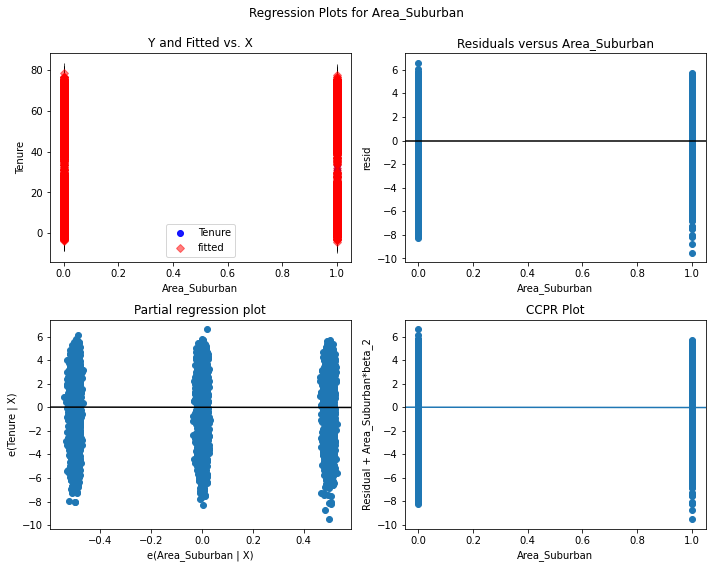

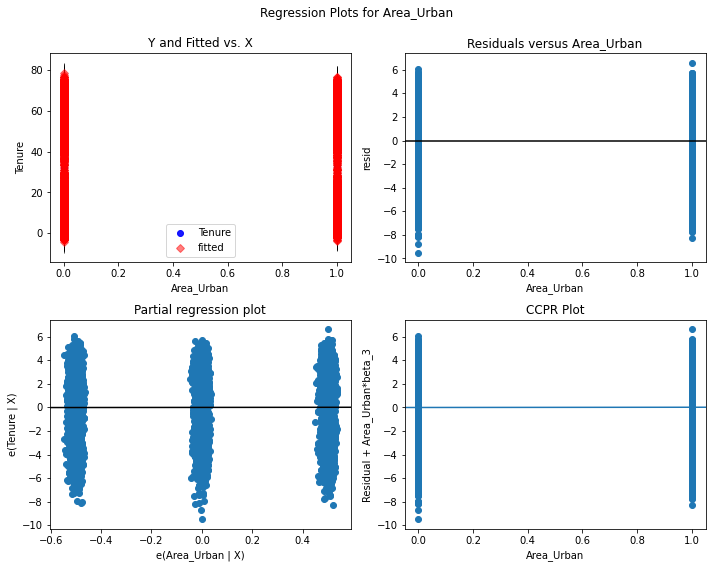

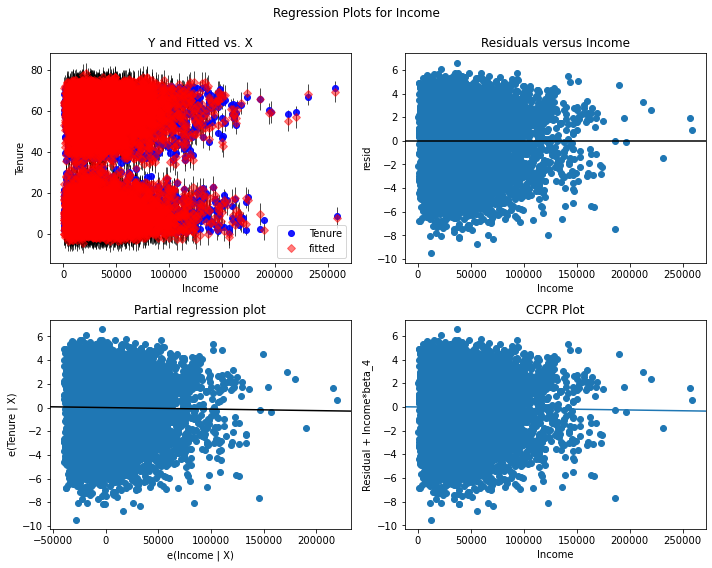

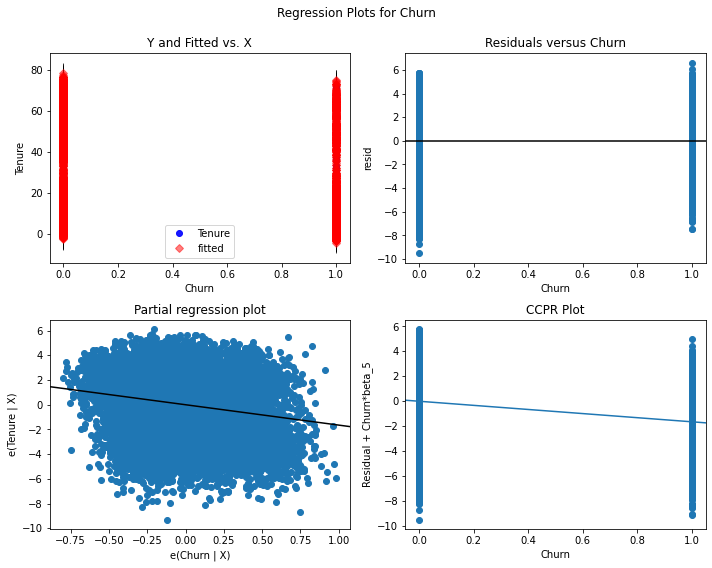

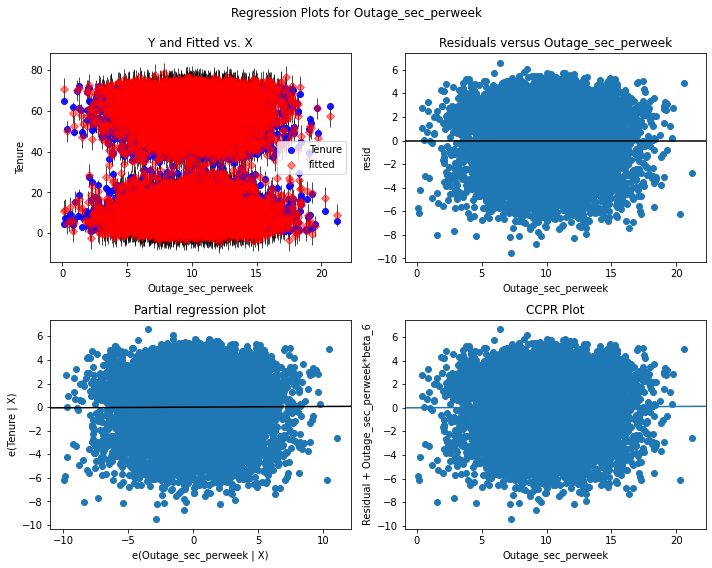

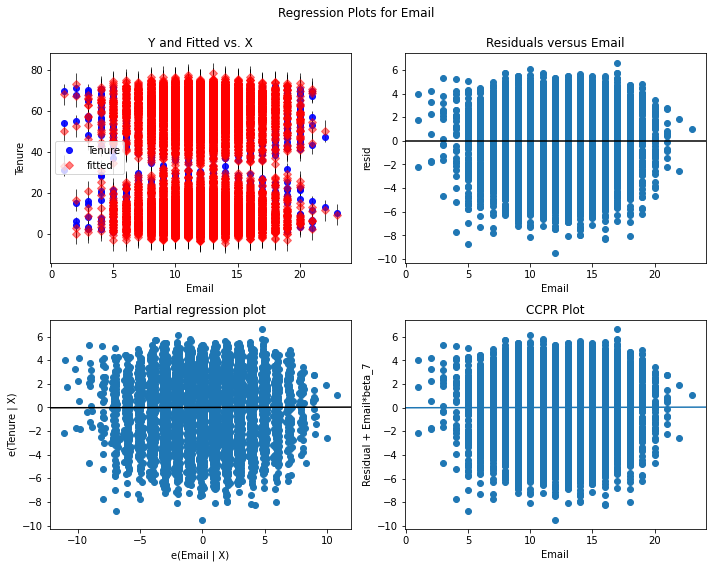

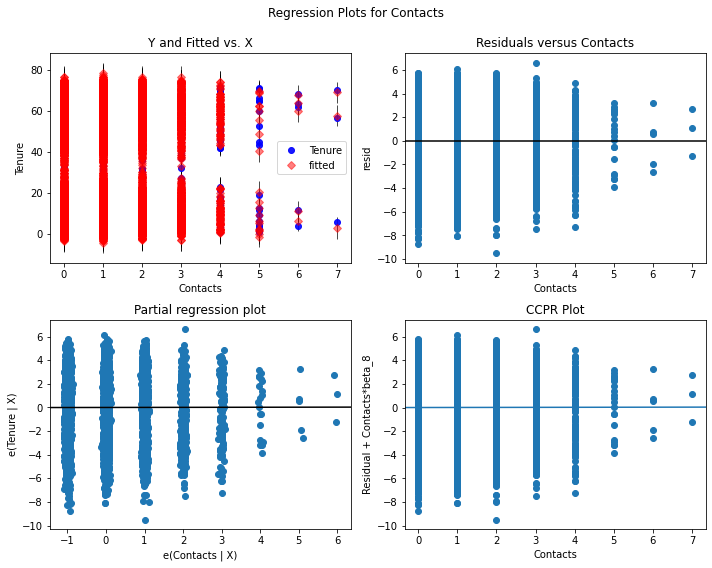

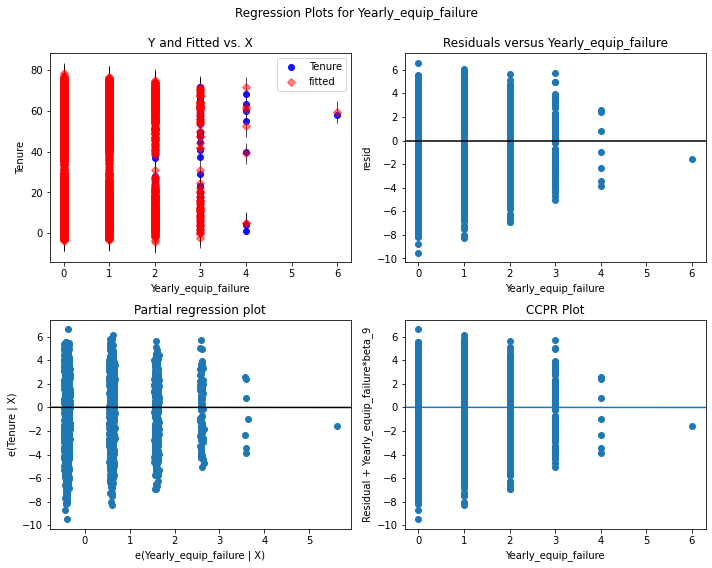

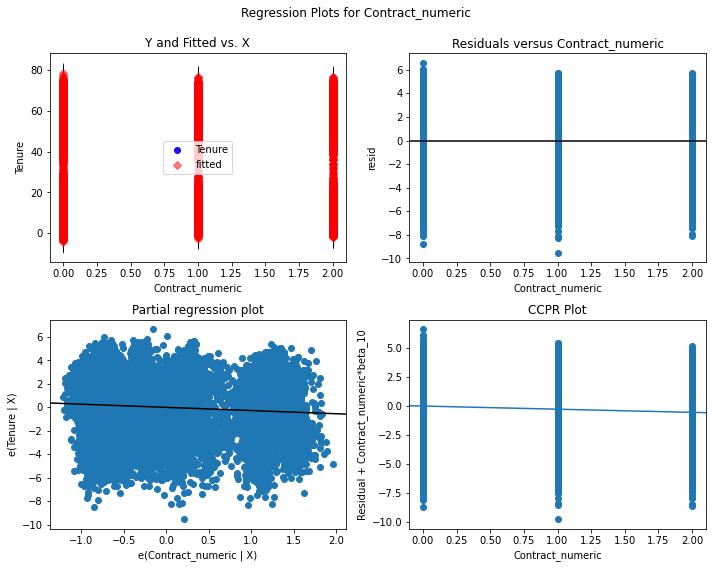

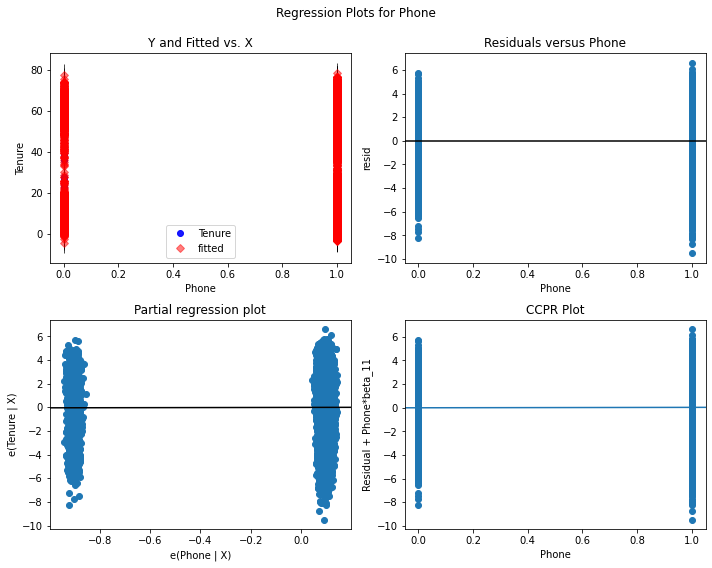

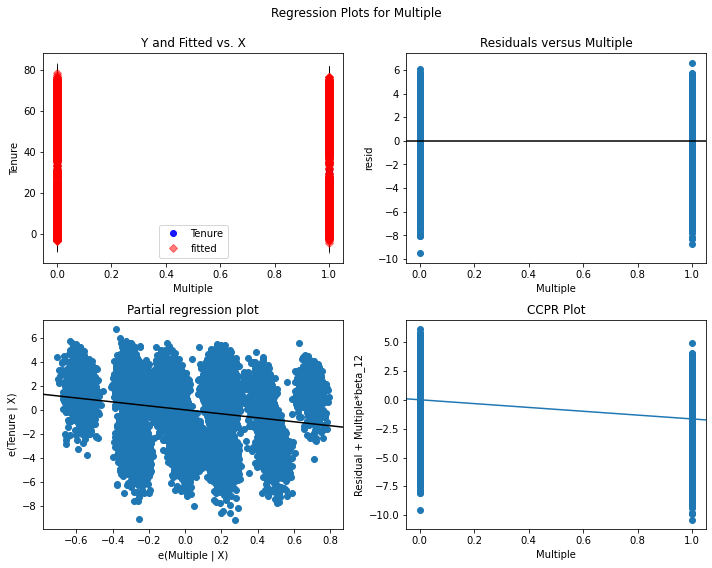

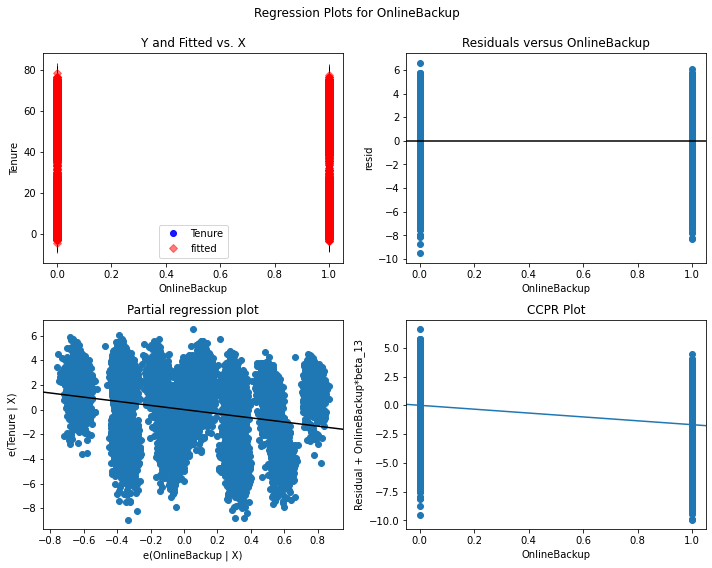

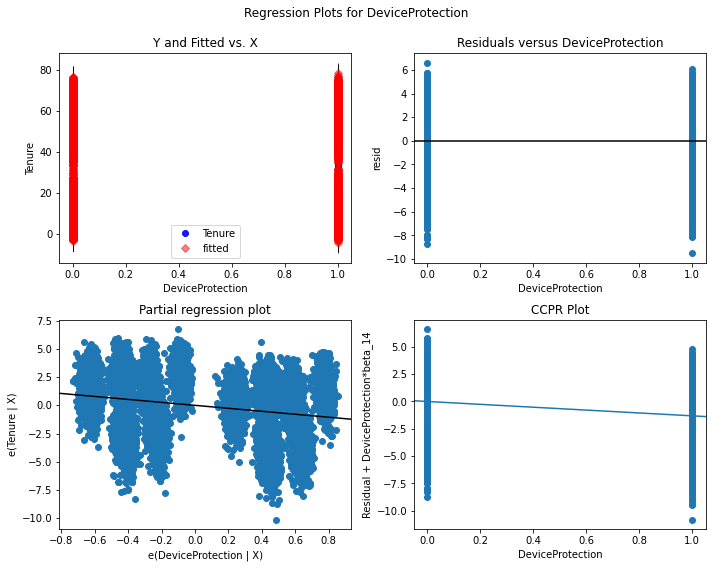

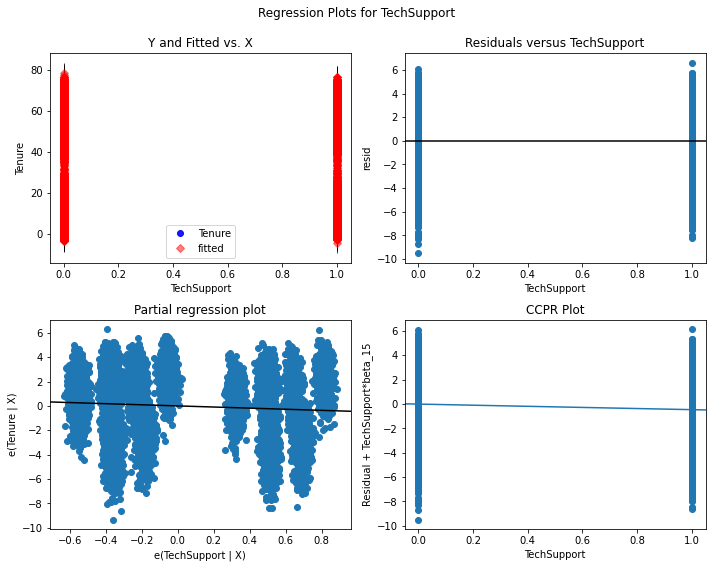

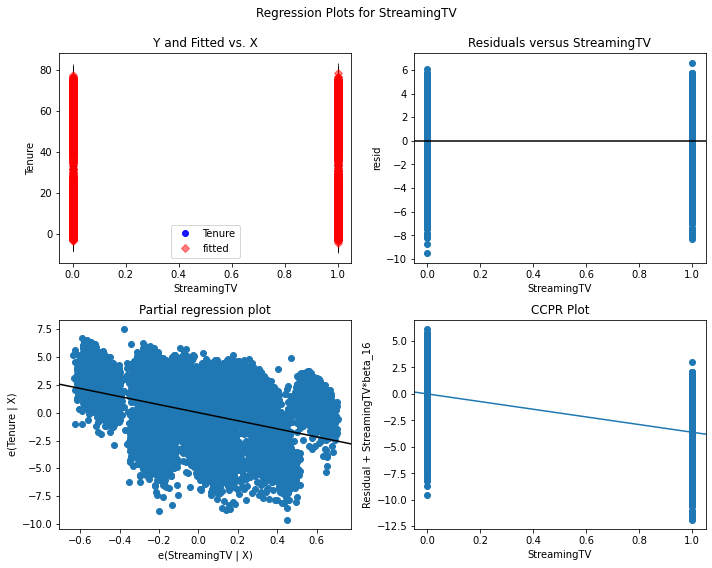

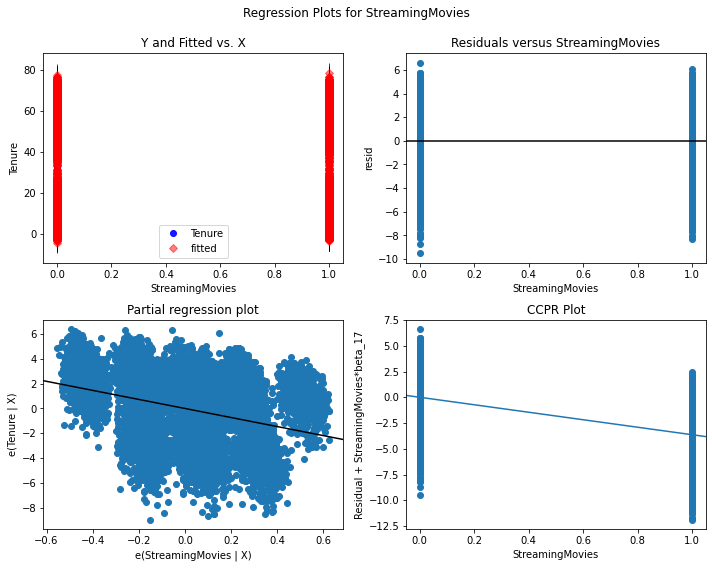

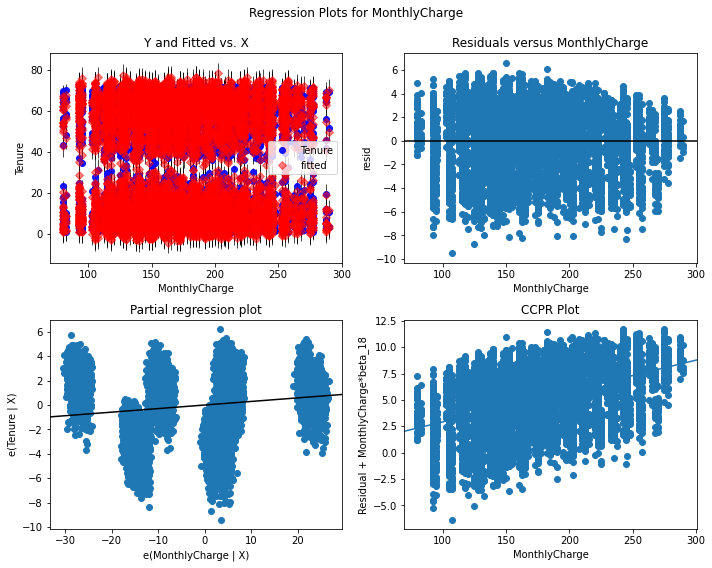

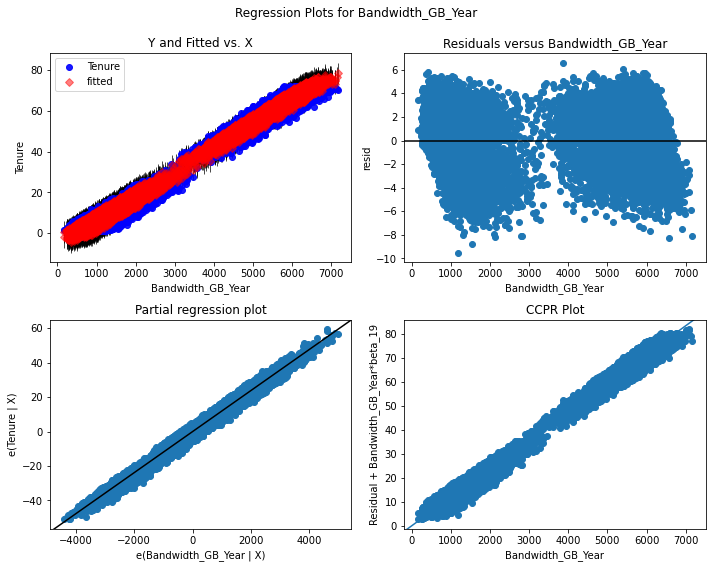

In [147]:
#Create orignal regression plots
list = ['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract_numeric', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(list):
    fig = plt.figure(figsize=(10, 8))
    fig = sm.graphics.plot_regress_exog(original_regression, list[i], fig=fig)
    i = i + 1
#(Python - Loop Lists, 2022) #(GeeksforGeeks, 2022)

In [148]:
#Check for multicollinearity using VIF (Sewell, 2022). 
x = df[['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Contract_numeric', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharge', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
#(Sewell, 2022)
vif_data

,Feature,VIF
0,Population,1.600665
1,Area_Suburban,1.968944
2,Area_Urban,1.963263
3,Income,2.919340
4,Churn,2.425440
5,Outage_sec_perweek,10.734561
6,Email,13.657282
7,Contacts,1.996613
8,Yearly_equip_failure,1.383719
9,Contract_numeric,1.864903


In [149]:
#Drop MonthlyCharge, Email, & Outage_sec_perweek due to VIF greater than 10 therefore they are highly correlated with another feature. 

#Re-fit multi linear regression model without MonthlyCharge, Email, & Outage_sec_perweek
regression_2 = ols('Tenure ~ Population + Area_Suburban + Area_Urban + Income + Churn + Contacts + Yearly_equip_failure + Contract_numeric + Phone + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_2.summary() #(GeeksforGeeks, 2022)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.923e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:01   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.828e+04
Df Residuals:                    9983   BIC:                         4.840e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8106      0.137    -13.215      0.000      -2.079      -1.542
Population            3.163e-06   4.27e-06      0.741      0.459    -5.2e-06    1.15e-05
Area_Suburban           -0.0270      0.066     -0.408      0.684      -0.157       0.103
Area_Urban               0.0163      0.066      0.246      0.806      -0.114       0.146
Income               -1.365e-06   9.58e-07     -1.424      0.154   -3.24e-06    5.14e-07
Churn                   -1.6142      0.082    -19.663      0.000      -1.775      -1.453
Contacts                 0.0077      0.027      0.282      0.778      -0.046       0.061
Yearly_equip_failure    -0.0079      0.043     -0.185      0.853      -0.091       0.075
Contract_numeric        -0.2628      0.034     -7.722      0.000      -0.329      -0.196
Phone                    0.0059      0.093      0.064      0.949      -0.176       0.188
Multiple                -0.6967      0.055    -12.635      0.000      -0.805      -0.589
OnlineBackup            -1.0194      0.055    -18.665      0.000      -1.126      -0.912
DeviceProtection        -0.9443      0.055    -17.296      0.000      -1.051      -0.837
TechSupport             -0.1066      0.056     -1.907      0.057      -0.216       0.003
StreamingTV             -2.3917      0.057    -41.684      0.000      -2.504      -2.279
StreamingMovies         -2.1079      0.059    -35.947      0.000      -2.223      -1.993
Bandwidth_GB_Year        0.0119   1.46e-05    813.612      0.000       0.012       0.012
==============================================================================
Omnibus:                     1015.500   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.624
Skew:                          -0.441   Prob(JB):                    5.52e-124
Kurtosis:                       2.235   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
np.sqrt(regression_2.scale)

2.7019697240721126

In [150]:
#Re-Check for multicollinearity using VIF (Sewell, 2022).
x = df[['Population', 'Area_Suburban', 'Area_Urban', 'Income', 'Churn', 'Contacts', 'Yearly_equip_failure', 'Contract_numeric', 'Phone', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
#(Sewell, 2022)
vif_data

,Feature,VIF
0,Population,1.577168
1,Area_Suburban,1.883399
2,Area_Urban,1.877805
3,Income,2.772220
4,Churn,2.345501
5,Contacts,1.939853
6,Yearly_equip_failure,1.368689
7,Contract_numeric,1.802584
8,Phone,6.489392
9,Multiple,1.882614


In [151]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Phone)
regression_3 = ols('Tenure ~ Population + Area_Suburban + Area_Urban + Income + Churn + Contacts + Yearly_equip_failure + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.319e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.827e+04
Df Residuals:                    9984   BIC:                         4.839e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8051      0.106    -16.951      0.000      -2.014      -1.596
Population            3.164e-06   4.27e-06      0.742      0.458    -5.2e-06    1.15e-05
Area_Suburban           -0.0270      0.066     -0.408      0.683      -0.157       0.103
Area_Urban               0.0162      0.066      0.245      0.806      -0.114       0.146
Income               -1.365e-06   9.58e-07     -1.425      0.154   -3.24e-06    5.13e-07
Churn                   -1.6143      0.082    -19.671      0.000      -1.775      -1.453
Contacts                 0.0077      0.027      0.282      0.778      -0.046       0.061
Yearly_equip_failure    -0.0079      0.043     -0.186      0.853      -0.091       0.075
Contract_numeric        -0.2628      0.034     -7.722      0.000      -0.329      -0.196
Multiple                -0.6967      0.055    -12.636      0.000      -0.805      -0.589
OnlineBackup            -1.0194      0.055    -18.666      0.000      -1.126      -0.912
DeviceProtection        -0.9444      0.055    -17.306      0.000      -1.051      -0.837
TechSupport             -0.1066      0.056     -1.908      0.056      -0.216       0.003
StreamingTV             -2.3917      0.057    -41.687      0.000      -2.504      -2.279
StreamingMovies         -2.1078      0.059    -35.950      0.000      -2.223      -1.993
Bandwidth_GB_Year        0.0119   1.46e-05    813.707      0.000       0.012       0.012
==============================================================================
Omnibus:                     1015.425   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.609
Skew:                          -0.441   Prob(JB):                    5.56e-124
Kurtosis:                       2.235   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
np.sqrt(regression_3.scale)

2.70183495421036

In [152]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Yearly_equip_failure)
regression_4 = ols('Tenure ~ Population + Area_Suburban + Area_Urban + Income + Churn + Contacts + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.771e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.827e+04
Df Residuals:                    9985   BIC:                         4.838e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8083      0.105    -17.210      0.000      -2.014      -1.602
Population         3.169e-06   4.27e-06      0.743      0.458   -5.19e-06    1.15e-05
Area_Suburban        -0.0270      0.066     -0.408      0.683      -0.157       0.103
Area_Urban            0.0163      0.066      0.246      0.806      -0.114       0.146
Income            -1.366e-06   9.58e-07     -1.426      0.154   -3.24e-06    5.12e-07
Churn                -1.6141      0.082    -19.671      0.000      -1.775      -1.453
Contacts              0.0077      0.027      0.283      0.777      -0.046       0.061
Contract_numeric     -0.2627      0.034     -7.721      0.000      -0.329      -0.196
Multiple             -0.6967      0.055    -12.637      0.000      -0.805      -0.589
OnlineBackup         -1.0193      0.055    -18.666      0.000      -1.126      -0.912
DeviceProtection     -0.9444      0.055    -17.306      0.000      -1.051      -0.837
TechSupport          -0.1066      0.056     -1.908      0.056      -0.216       0.003
StreamingTV          -2.3918      0.057    -41.691      0.000      -2.504      -2.279
StreamingMovies      -2.1078      0.059    -35.951      0.000      -2.223      -1.993
Bandwidth_GB_Year     0.0119   1.46e-05    813.752      0.000       0.012       0.012
==============================================================================
Omnibus:                     1015.878   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.695
Skew:                          -0.441   Prob(JB):                    5.33e-124
Kurtosis:                       2.234   Cond. No.                     2.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
np.sqrt(regression_4.scale)

2.7017043124477342

In [153]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Area_Urban)
regression_5 = ols('Tenure ~ Population + Area_Suburban + Income + Churn + Contacts + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.292e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.827e+04
Df Residuals:                    9986   BIC:                         4.837e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8002      0.100    -18.040      0.000      -1.996      -1.605
Population          3.17e-06   4.27e-06      0.743      0.457   -5.19e-06    1.15e-05
Area_Suburban        -0.0352      0.057     -0.614      0.539      -0.147       0.077
Income            -1.366e-06   9.58e-07     -1.425      0.154   -3.24e-06    5.13e-07
Churn                -1.6140      0.082    -19.671      0.000      -1.775      -1.453
Contacts              0.0077      0.027      0.283      0.777      -0.046       0.061
Contract_numeric     -0.2628      0.034     -7.722      0.000      -0.329      -0.196
Multiple             -0.6967      0.055    -12.637      0.000      -0.805      -0.589
OnlineBackup         -1.0192      0.055    -18.666      0.000      -1.126      -0.912
DeviceProtection     -0.9443      0.055    -17.305      0.000      -1.051      -0.837
TechSupport          -0.1065      0.056     -1.906      0.057      -0.216       0.003
StreamingTV          -2.3919      0.057    -41.696      0.000      -2.504      -2.279
StreamingMovies      -2.1079      0.059    -35.953      0.000      -2.223      -1.993
Bandwidth_GB_Year     0.0119   1.46e-05    813.836      0.000       0.012       0.012
==============================================================================
Omnibus:                     1015.806   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.707
Skew:                          -0.441   Prob(JB):                    5.30e-124
Kurtosis:                       2.234   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
np.sqrt(regression_5.scale)

2.7015772318209295

In [154]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Contacts)
regression_6 = ols('Tenure ~ Population + Area_Suburban + Income + Churn + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.900e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.827e+04
Df Residuals:                    9987   BIC:                         4.836e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7927      0.096    -18.643      0.000      -1.981      -1.604
Population         3.174e-06   4.27e-06      0.744      0.457   -5.19e-06    1.15e-05
Area_Suburban        -0.0352      0.057     -0.615      0.539      -0.147       0.077
Income            -1.365e-06   9.58e-07     -1.425      0.154   -3.24e-06    5.13e-07
Churn                -1.6137      0.082    -19.670      0.000      -1.774      -1.453
Contract_numeric     -0.2627      0.034     -7.720      0.000      -0.329      -0.196
Multiple             -0.6969      0.055    -12.645      0.000      -0.805      -0.589
OnlineBackup         -1.0190      0.055    -18.665      0.000      -1.126      -0.912
DeviceProtection     -0.9443      0.055    -17.306      0.000      -1.051      -0.837
TechSupport          -0.1067      0.056     -1.910      0.056      -0.216       0.003
StreamingTV          -2.3920      0.057    -41.700      0.000      -2.504      -2.280
StreamingMovies      -2.1078      0.059    -35.954      0.000      -2.223      -1.993
Bandwidth_GB_Year     0.0119   1.46e-05    813.909      0.000       0.012       0.012
==============================================================================
Omnibus:                     1015.481   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.631
Skew:                          -0.441   Prob(JB):                    5.50e-124
Kurtosis:                       2.235   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
np.sqrt(regression_6.scale)

2.701452827399462

In [155]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Area_Suburban)
regression_7 = ols('Tenure ~ Population + Income + Churn + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.619e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.827e+04
Df Residuals:                    9988   BIC:                         4.835e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8049      0.094    -19.182      0.000      -1.989      -1.620
Population         3.144e-06   4.27e-06      0.737      0.461   -5.22e-06    1.15e-05
Income            -1.367e-06   9.58e-07     -1.427      0.154   -3.25e-06    5.11e-07
Churn                -1.6131      0.082    -19.665      0.000      -1.774      -1.452
Contract_numeric     -0.2627      0.034     -7.721      0.000      -0.329      -0.196
Multiple             -0.6970      0.055    -12.646      0.000      -0.805      -0.589
OnlineBackup         -1.0186      0.055    -18.659      0.000      -1.126      -0.912
DeviceProtection     -0.9440      0.055    -17.303      0.000      -1.051      -0.837
TechSupport          -0.1062      0.056     -1.901      0.057      -0.216       0.003
StreamingTV          -2.3922      0.057    -41.706      0.000      -2.505      -2.280
StreamingMovies      -2.1081      0.059    -35.962      0.000      -2.223      -1.993
Bandwidth_GB_Year     0.0119   1.46e-05    813.973      0.000       0.012       0.012
==============================================================================
Omnibus:                     1014.795   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.686
Skew:                          -0.441   Prob(JB):                    5.35e-124
Kurtosis:                       2.235   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
np.sqrt(regression_7.scale)

2.70136870474428

In [156]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Population)
regression_8 = ols('Tenure ~ Income + Churn + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.482e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24121.
No. Observations:               10000   AIC:                         4.826e+04
Df Residuals:                    9989   BIC:                         4.834e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7893      0.092    -19.513      0.000      -1.969      -1.610
Income            -1.366e-06   9.58e-07     -1.425      0.154   -3.24e-06    5.13e-07
Churn                -1.6134      0.082    -19.668      0.000      -1.774      -1.453
Contract_numeric     -0.2624      0.034     -7.713      0.000      -0.329      -0.196
Multiple             -0.6969      0.055    -12.644      0.000      -0.805      -0.589
OnlineBackup         -1.0185      0.055    -18.657      0.000      -1.125      -0.911
DeviceProtection     -0.9444      0.055    -17.311      0.000      -1.051      -0.837
TechSupport          -0.1068      0.056     -1.913      0.056      -0.216       0.003
StreamingTV          -2.3925      0.057    -41.714      0.000      -2.505      -2.280
StreamingMovies      -2.1069      0.059    -35.957      0.000      -2.222      -1.992
Bandwidth_GB_Year     0.0119   1.46e-05    814.021      0.000       0.012       0.012
==============================================================================
Omnibus:                     1013.699   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.870
Skew:                          -0.441   Prob(JB):                    4.88e-124
Kurtosis:                       2.235   Cond. No.                     1.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
np.sqrt(regression_8.scale)

2.701306940105014

In [157]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (Income)
regression_9 = ols('Tenure ~ Churn + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.053e+05
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24122.
No. Observations:               10000   AIC:                         4.826e+04
Df Residuals:                    9990   BIC:                         4.834e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8428      0.084    -22.026      0.000      -2.007      -1.679
Churn                -1.6146      0.082    -19.684      0.000      -1.775      -1.454
Contract_numeric     -0.2624      0.034     -7.713      0.000      -0.329      -0.196
Multiple             -0.6967      0.055    -12.641      0.000      -0.805      -0.589
OnlineBackup         -1.0179      0.055    -18.646      0.000      -1.125      -0.911
DeviceProtection     -0.9455      0.055    -17.331      0.000      -1.052      -0.839
TechSupport          -0.1075      0.056     -1.925      0.054      -0.217       0.002
StreamingTV          -2.3919      0.057    -41.702      0.000      -2.504      -2.280
StreamingMovies      -2.1063      0.059    -35.946      0.000      -2.221      -1.991
Bandwidth_GB_Year     0.0119   1.46e-05    814.002      0.000       0.012       0.012
==============================================================================
Omnibus:                     1016.161   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.791
Skew:                          -0.441   Prob(JB):                    3.08e-124
Kurtosis:                       2.235   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
np.sqrt(regression_9.scale)

2.7014463175216297

In [158]:
#Feature Selection with Backward Stepwise Elimination
#Drop highest P-value, above 0.05 (TechSupport)
regression_10 = ols('Tenure ~ Churn + Contract_numeric + Multiple + OnlineBackup + DeviceProtection + StreamingTV + StreamingMovies + Bandwidth_GB_Year', data=df).fit()
  
# display model summary
regression_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.185e+05
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -24124.
No. Observations:               10000   AIC:                         4.827e+04
Df Residuals:                    9991   BIC:                         4.833e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8832      0.081    -23.247      0.000      -2.042      -1.724
Churn                -1.6198      0.082    -19.756      0.000      -1.781      -1.459
Contract_numeric     -0.2628      0.034     -7.724      0.000      -0.329      -0.196
Multiple             -0.6950      0.055    -12.610      0.000      -0.803      -0.587
OnlineBackup         -1.0173      0.055    -18.633      0.000      -1.124      -0.910
DeviceProtection     -0.9448      0.055    -17.318      0.000      -1.052      -0.838
StreamingTV          -2.3904      0.057    -41.674      0.000      -2.503      -2.278
StreamingMovies      -2.1035      0.059    -35.905      0.000      -2.218      -1.989
Bandwidth_GB_Year     0.0119   1.46e-05    813.995      0.000       0.012       0.012
==============================================================================
Omnibus:                     1015.035   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.746
Skew:                          -0.442   Prob(JB):                    1.91e-124
Kurtosis:                       2.235   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
#Calculate residual Error of orignial model
np.sqrt(regression_10.scale)

2.701811907009137

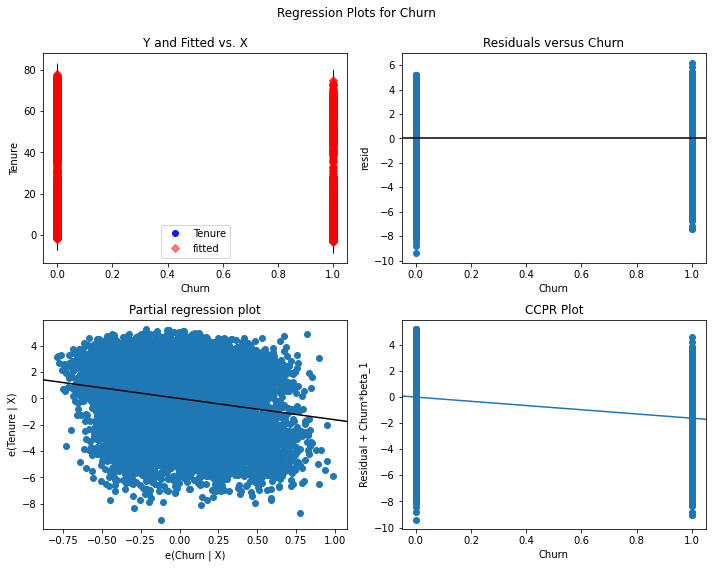

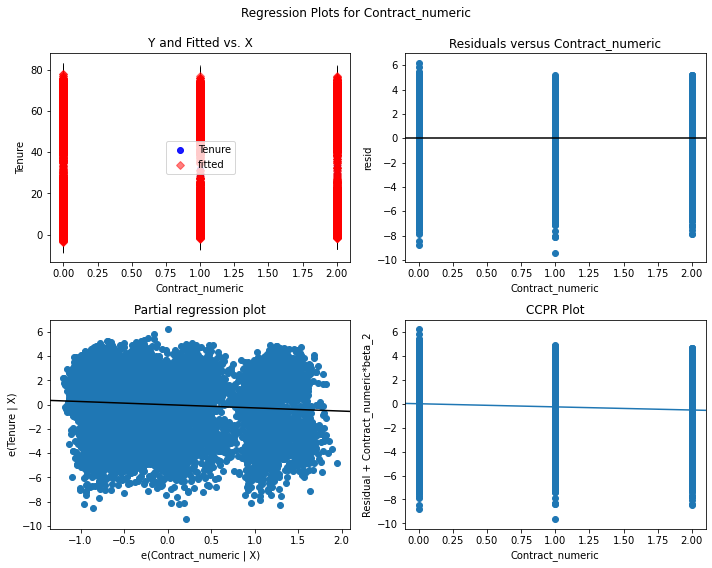

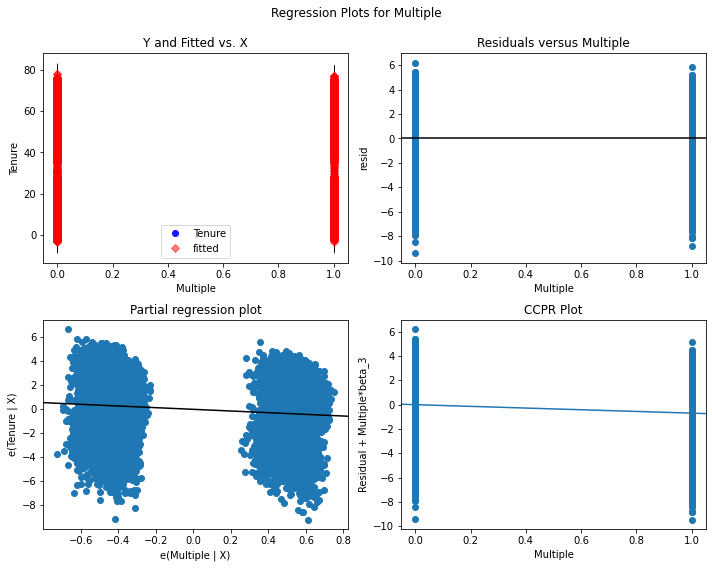

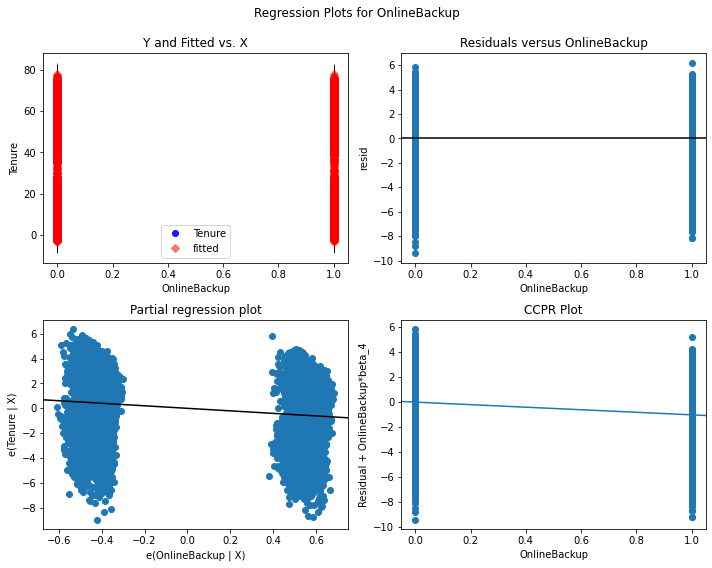

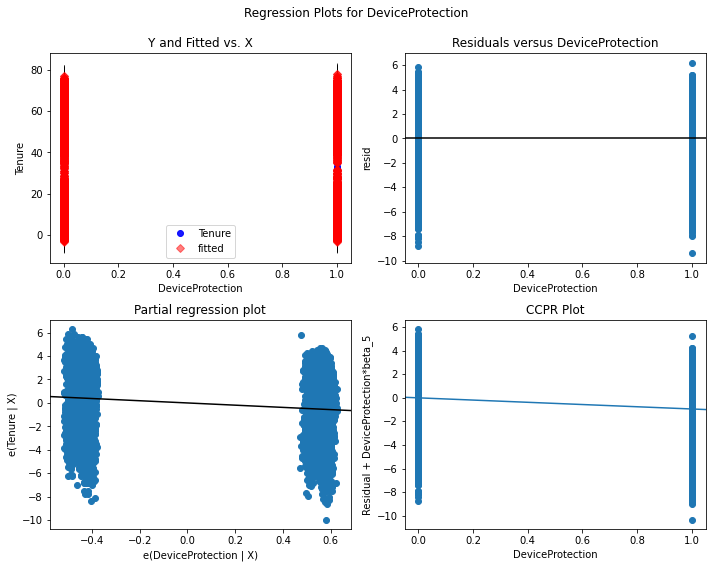

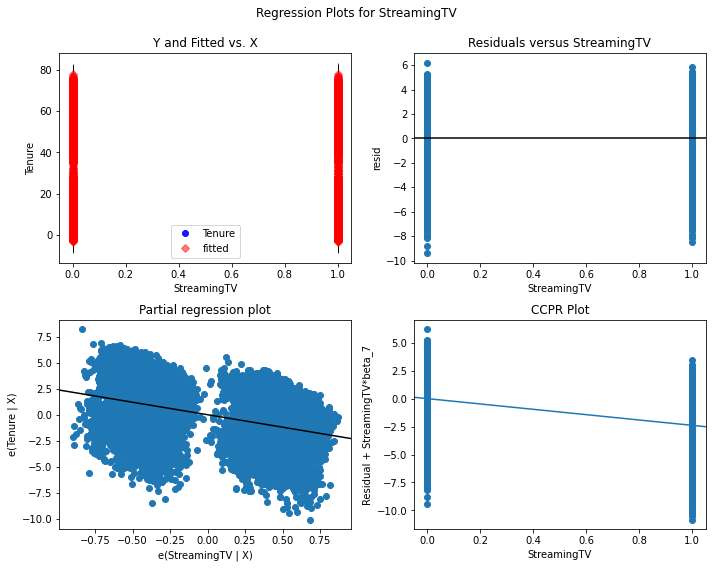

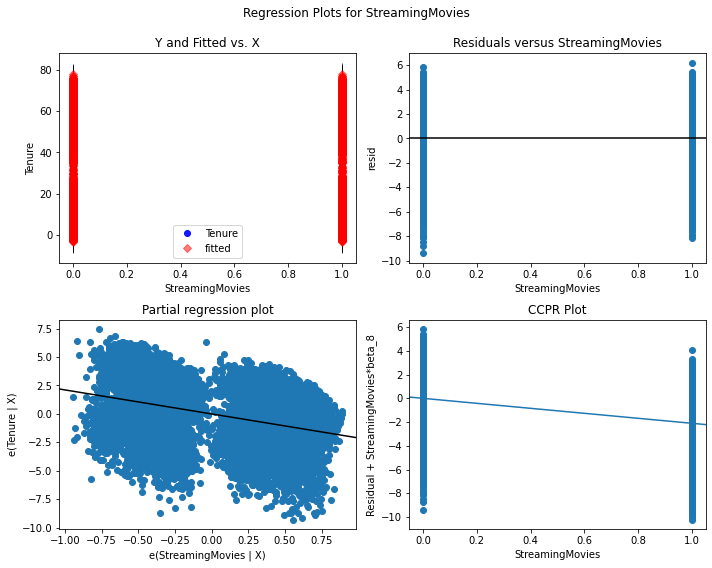

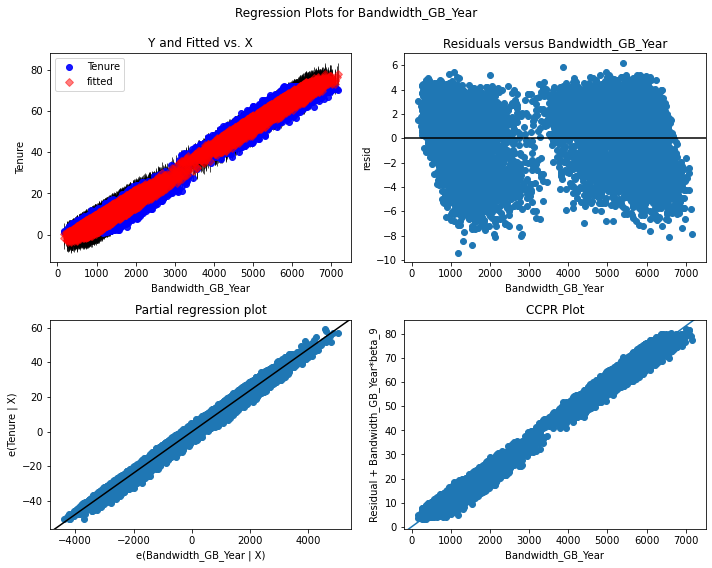

In [159]:
#All P-values are below 0.05. regression_10 shows the final reduced model. 

#Create regression plots from reduced dataset.

list_2 = ['Churn', 'Contract_numeric', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Bandwidth_GB_Year']

i=0 
while i < len(list_2):
    fig = plt.figure(figsize=(10, 8))
    fig = sm.graphics.plot_regress_exog(regression_9, list_2[i], fig=fig)
    i = i + 1
#(Python - Loop Lists, 2022) #(GeeksforGeeks, 2022)